# Hadamard Tutorial: Through Simulation

### Standard Imports for Plotting

In [1]:
import matplotlib
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('figure',figsize=(12, 8))
matplotlib.rc('figure',dpi=300 )

In [2]:
from scipy import constants

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from scipy.interpolate import interp1d
from scipy.optimize import fmin
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Custom Imports

* The associated modules below are used to generate pseudo random sequences (PRS) using a Hadamard sequence construction using the polynomial, shift-register approach outlined by Harwitt and Sloane

### Fix these to be specific

In [5]:
import PRS_Generator as PRSG

### Script to perform a cross correlation...
* The Fast Hadamard Transform is one way to recover a spectrum, however, a more straightforward but computationally costly approach is cross correlation.
* The cross correlation of the raw data and the matrix *inverse* of the applied sequence can also recover the spectrum.

In [6]:
from numpy.fft import fft, ifft

def periodic_corr(x, y):
    """Periodic correlation, implemented using the FFT.

    x and y must be real sequences with the same length.
    """
    return ifft(fft(x) * fft(y).conj()).real

## Sequence Profiles

* The following is to graphically illustrate a single sequence. 
* We use the term "Hadamard" but the sequences that we apply are derived from Hadamard mathematics and are formally called "Simplex Sequences."

### The length of each sequency scales by the power of $2^n - 1$

### For example a sequence of $2^5 - 1$ has a length of 31. 

Duty Cycle: 0.516 %
[0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1]
31


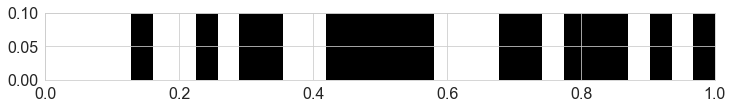

In [7]:
bits = 5
osFactor = 1
prs = PRSG.Sequence_Generator(bits)
print("Duty Cycle: %.3f %%"%(prs.sum()/len(prs)))
print(prs)
print(len(prs))
fig, ax = plt.subplots(nrows = 1, figsize = (12,8))
prs = np.array(prs)
prs.shape = (len(prs),1)
extent=[prs.min(),prs.max(),0,0.1]
ax.imshow(prs.T, interpolation='none', cmap = 'binary',  extent = extent)

# A key aspect of the HT experiment that has not been convered includes the concept of experimental length. The HT-IMS experiment requres that the sequence length match that of the data acquisition time. To ensure clarity, let's call each element of a PRS a bin.  Now the question is how to match the bin into the time domain?

# If we simply move forward with a 1:1 mapping of bin length to time we run into a problem.  With a 31 element sequence *and* each bin correponds to the spacing between a single data point (i.e. 5 ${\mu}s$) this would correspond to a single spectrum that is 155 ${\mu}s$ in length.  This is clearly not compatible with an IMS spectrum and to make things even worse this corresponds to only 31 data points per spectrum.  So what's the trick? 

## *Oversampling or Stretching...*

Duty Cycle: 0.258 %
31
62


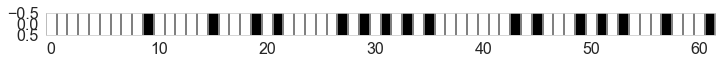

In [11]:
bits = 5
osFactor = 2
prs = PRSG.Sequence_Generator(bits)
osprs = PRSG.Generate_Oversampled_PRS(bits, osFactor)

print("Duty Cycle: %.3f %%"%(osprs.sum()/len(osprs)))

fig, ax = plt.subplots(nrows = 1, figsize = (12,8))

ax0 = ax
osprs = np.array(osprs, dtype = np.float32)
osprs -= 0.5
osprs.shape = (len(osprs),1)

aspectLen = len(osprs)

ax0.imshow(osprs.T, interpolation='none', cmap = 'binary', aspect = 2.0)#, extent = extent)
ax0.set_xticks(np.arange(-.5, len(osprs), 1), minor=True);

# Gridlines based on minor ticks
ax0.grid(which='minor', color='grey', linestyle='-', linewidth=2)
ax0.grid(False, which='major')

print(len(prs))
print(len(osprs))

Duty Cycle: 0.387 %
31
124


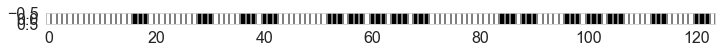

In [18]:
bits = 5
osFactor = 4
prs = PRSG.Sequence_Generator(bits)
# osprs = PRSG.Generate_Oversampled_PRS(bits, osFactor)

osprs = PRSG.Generate_Oversampled_PRS_v2(bits, osFactor, IFT = True, savePRS = False, invert = False, pulseLength = 3)

print("Duty Cycle: %.3f %%"%(osprs.sum()/len(osprs)))

fig, ax = plt.subplots(nrows = 1, figsize = (12,8))

ax0 = ax
osprs = np.array(osprs, dtype = np.float32)
osprs -= 0.5
osprs.shape = (len(osprs),1)

aspectLen = len(osprs)

ax0.imshow(osprs.T, interpolation='none', cmap = 'binary', aspect = 2.0)#, extent = extent)
ax0.set_xticks(np.arange(-.5, len(osprs), 1), minor=True);

# Gridlines based on minor ticks
ax0.grid(which='minor', color='grey', linestyle='-', linewidth=2)
ax0.grid(False, which='major')

print(len(prs))
print(len(osprs))

In [19]:
bits = 6
osFactor = 80
prs = PRSG.Sequence_Generator(bits)
# osprs = PRSG.Generate_Oversampled_PRS(bits, osFactor)

pulseLength = 40
IFTBool = True
osprs = PRSG.Generate_Oversampled_PRS_v2(bits, osFactor, IFT = IFTBool, savePRS = False, invert = False, pulseLength = pulseLength)

# fileName = "B%dO%dP%d.csv"%(bits,osFactor,pulseLength)


print("Duty Cycle: %.3f %%"%(osprs.sum()/len(osprs)))

saveBool = True
if saveBool:
    if IFTBool:
        fileName = "P%d%d%d.csv"%(bits,osFactor,pulseLength)
        np.savetxt(fileName, osprs, fmt = "%.d")
        print(fileName)
        
    else:
        fileName = "P%d%d.csv"%(bits,osFactor)
        np.savetxt(fileName, osprs, fmt = "%.d")
        print(fileName)        


# fig, ax = plt.subplots(nrows = 1, figsize = (12,8))

# ax0 = ax
# osprs = np.array(osprs, dtype = np.float)
# osprs -= 0.5
# osprs.shape = (len(osprs),1)

# aspectLen = len(osprs)

# ax0.imshow(osprs.T, interpolation='none', cmap = 'binary', aspect = 2.0)#, extent = extent)
# ax0.set_xticks(np.arange(-.5, len(osprs), 1), minor=True);

# # Gridlines based on minor ticks
# ax0.grid(which='minor', color='grey', linestyle='-', linewidth=2)
# ax0.grid(False, which='major')

print(len(prs))
print(len(osprs))
print("*****")

Duty Cycle: 0.254 %
P68040.csv
63
5040
*****


## Target your ideal spectral length, and decide on how many points you want...
For example 63 ms

In [21]:
bits = 6
osFactor = 150
prs = PRSG.Sequence_Generator(bits)
osprs = PRSG.Generate_Oversampled_PRS(bits, osFactor)

timeSpacing = 0.005 #time in ms #this is the frequency of the clock needed for the teensy.
totalTime = len(osprs)*timeSpacing
print(len(prs))
print(len(osprs))
print("Total Time: %s ms"%totalTime)

63
9450
Total Time: 47.25 ms


In [22]:
def getRegression(x,y):
    f1 = lambda x, *p: polyval(p, x)
    p, cov = curve_fit(f1, x, y, [1, 1])
    # simulated draws from the probability density function of the regression
    
    xi = linspace(np.min(x), np.max(x), 100)
    ps = np.random.multivariate_normal(p, cov, 10000)
    ysample = np.asarray([f1(xi, *pi) for pi in ps])
    lower = percentile(ysample, 2.5, axis=0)
    upper = percentile(ysample, 97.5, axis=0)

    # regression estimate line
    y_fit = poly1d(p)(xi)
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r2 = r_value**2
    return xi, y_fit, lower, upper, slope, intercept, r2

### Begin Multiplexing Simulation

In [23]:
bits = 4
osFactor = 1
prs = PRSG.Sequence_Generator(bits)
print(prs)

[0 0 0 1 0 0 1 1 0 1 0 1 1 1 1]


In [24]:
osprs = PRSG.Generate_Oversampled_PRS(bits, osFactor)
print(len(osprs))
print(osprs)
# n = 0
# for i in osprs:
#     print(n,n+cen, i)
#     n+=1

15
[0 0 0 1 0 0 1 1 0 1 0 1 1 1 0]


The resulting Simplex matrix, SN, is obtained by
removing the first row and the first column of the
matrix HN-1 and replacing the remaining +1’s with 0’s
and the remaining -1’s with +1’s. 

In [26]:
def transformSimplex(prs):
    '''
    Initial attempt to make a simplex matrix -1/1 instead of 0s and 1s
    '''
    newSeq = []
    for i in prs:
        if i == 1:
            newSeq.append(-1)
        elif i == 0:
            newSeq.append(+1)
    return newSeq

#### Create circular matrix for ultimate inversion

In [27]:
mtx = np.zeros([len(osprs), len(osprs)])
for i in range(len(osprs)):
    mtx[i,:] = np.roll(osprs,i)
print(mtx.shape)

(15, 15)


[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, ''),
 Text(12.0, 0, ''),
 Text(14.0, 0, ''),
 Text(16.0, 0, '')]

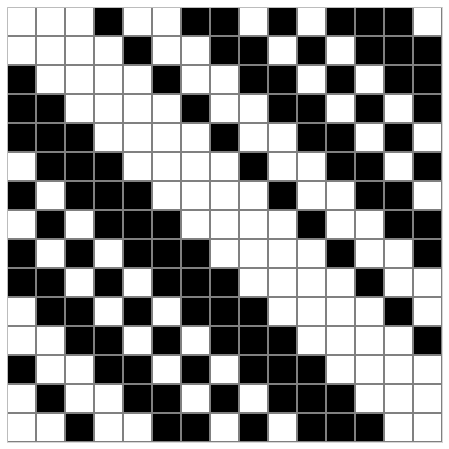

In [28]:

fig, ax = plt.subplots(nrows = 1, figsize = (12,8))

ax0 = ax


ax0.imshow(mtx, interpolation='none', cmap = 'binary', aspect = 1.0)#, extent = extent)
ax0.set_xticks(np.arange(-.5, len(osprs), 1), minor=True);
ax0.set_yticks(np.arange(-.5, len(osprs), 1), minor=True);

# Gridlines based on minor ticks
ax0.grid(which='minor', color='grey', linestyle='-', linewidth=2)
ax0.grid(False, which='major')
ax0.set_yticklabels([])
ax0.set_xticklabels([])


### Invert matrix (necessary for deconvolution)

In [29]:
invprs = np.linalg.inv(mtx)

--------

In [32]:
def imsPeakParams(voltage, length, charge, temp, gatePW, driftTime, diffOnly = False):
    '''
    length is in meters
    temp is in Kelvins
    gatePW is in microseconds
    driftTime is in ms
    '''
    kerg = 1.38065E-16
    diffPW = np.log(2) * 16 * kerg * temp * 0.0000001 / (
        constants.e * charge * voltage)
    diffPW = np.sqrt(diffPW) * driftTime
    if diffOnly:
        return diffPW
    minpw = np.sqrt(diffPW**2 + gatePW**2)
    return minpw

In [33]:
def getGaussian(amp, fwhm, mean):
    '''
    Return a Gaussian peak based upon the input parameters
    '''
    return lambda x: amp * np.exp(-4. * np.log(2) * (x - mean)**2 / fwhm**2)

### Parameters for Single Pulse IMS

In [34]:
mobRange=np.array([ 1.95, 0.9628, 0.701])#define range of Ko values to be simulated

In [35]:
DL = 17.5  #in cm
DV = 8000  #in volts
T = 30
PW = 150.0  #in microseconds
PW /= 1E6  #Convert to seconds
dt = DL**2/(DV*mobRange[0]) #calculate drift time for given voltage
#This includes diffusion but when performing convolution, there is some evidence to just use the diffusion term and correlate across the opening time.
minPW = imsPeakParams(DV, DL, 1, T + 273.15, PW, dt)
minPWDiff = imsPeakParams(DV, DL, 1, T + 273.15, PW, dt, True)
print("Centroid Peak: %.5f (s)"%dt)
print("FWHM with Diffusion: %.5f (s)"%minPW)
print("Theoretical Resolving Power: %.2f"%(dt/minPW))
print("Theoretical Resolving Power (Diffusion Only): %.2f"%(dt/minPWDiff))

Centroid Peak: 0.01963 (s)
FWHM with Diffusion: 0.00019 (s)
Theoretical Resolving Power: 102.82
Theoretical Resolving Power (Diffusion Only): 166.17


In [38]:
for mob in mobRange:
    dt=DL**2/(DV*mob) #calculate drift time for given voltage
    print("Theoretical Drift Time: %.3f ms"%(dt*1000))

#Reset value
dt = DL**2/(DV*mobRange[0]) #calculate drift time for given voltage

Theoretical Drift Time: 19.631 ms
Theoretical Drift Time: 39.760 ms
Theoretical Drift Time: 54.609 ms


### Depending on the sampling rate of your detector, this may or may not be appropriate.  

In [39]:
bits = 5 
osFactor = 20
numSamples = ((2**bits)-1) * osFactor#2000 #num of samples to consider for a given pseudo random sequence.
osprs = PRSG.Generate_Oversampled_PRS(bits, osFactor)
print('Number of Samples: %d'%numSamples)

Number of Samples: 620


In [40]:
#value in seconds and should match the sampling rate of your detector (ideally) or be an integer divisor of said rate.
samplePeriod = 0.0001  

In [41]:
startTime = 0.0
scanTime = samplePeriod*numSamples
t = np.linspace(startTime, scanTime, numSamples)

In [68]:
#Parameters to make a simulate peak
AMPS = [100]
FWHMS = [minPW]
FWHMDIFF = [minPWDiff]
MEANS = [dt]

# Used to add random noise
# 0 is no noise and then you simply move on up.
RMS = 2.1

y = np.random.randn(len(t)) * RMS
y2 = np.random.randn(len(t)) * RMS


# Create spectrum
for a, w, m in zip(AMPS, FWHMS, MEANS):
    y += getGaussian(a, w, m)(t)

for a, w, m in zip(AMPS, FWHMDIFF, MEANS):
    y2 += getGaussian(a, w, m)(t)    

Text(0.5, 1.0, 'Ion Mobility Simulation')

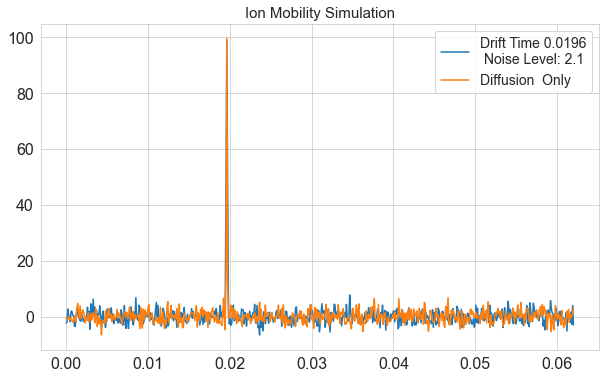

In [69]:
markerBool = False
# markerBool = True

plt.subplots(figsize=(10, 6))

if markerBool:
    plt.plot(t, y, 'bo-', mfc = 'w', label = "Drift Time %.4f\n Noise Level: %.1f"%(dt, RMS))
    plt.plot(t, y2, 'ro-', mfc = 'w', label = "Diffusion Only")
else:
    plt.plot(t, y, label = "Drift Time %.4f\n Noise Level: %.1f"%(dt, RMS))
    plt.plot(t, y2, '-', label = "Diffusion  Only")

plt.legend(fontsize = 14)
plt.title("Ion Mobility Simulation", fontsize = 15)

### To simulate multiple openings, the gating sequence must be convoluted with the ideal peak
* The gaussian peak shown above is an ideal and its width is just diffusion alone.
* The subsequent cell correlates the diffusion width with multiple gate releases. 
    * The challenge is to make sure the intensity is normalized correctly.
        * This NEEDS attention!
* Currently this approach used the simulated peak WITH diffusion and the Initial Gate Pulse Width.

In [70]:
def circular_convolution(signal,ker):
    '''
        https://stackoverflow.com/questions/35474078/python-1d-array-circular-convolution
        signal: real 1D array
        ker: real 1D array
        signal and ker must have same shape
    '''
    return np.real(np.fft.ifft( np.fft.fft(signal)*np.fft.fft(ker) ))

In [71]:
def normVector(datArray, returnFactor = False):
    '''
    normalize an array to 1
    '''
    datArray = np.array(datArray)
    datCopy = datArray.copy()
    sf = datCopy.max()
    datCopy /= sf
    if returnFactor:
        return datCopy, sf
    else:
        return datCopy

In [72]:
yN = normVector(y, False)

(175.0, 225.0)

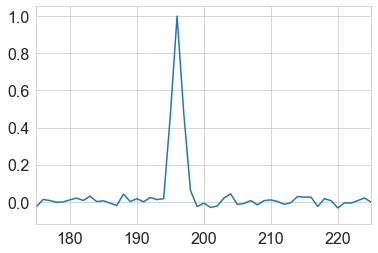

In [73]:
plt.plot(yN)
plt.xlim(175,225)

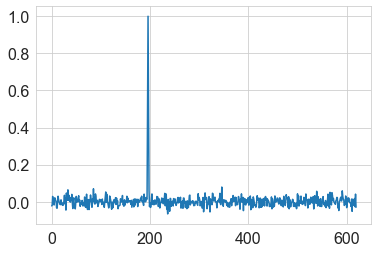

In [74]:
plt.plot(yN)

In [75]:
circonv = circular_convolution(yN, osprs)

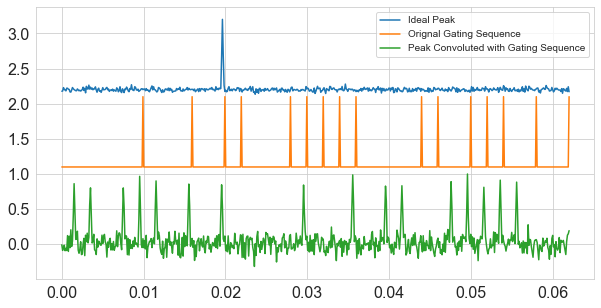

In [76]:
plt.figure(figsize=(10,5))
plt.plot(t, yN+ 2.2, label = "Ideal Peak")
plt.plot(t, osprs+1.1, label = "Orignal Gating Sequence")
plt.plot(t, circonv/circonv.max(), label = "Peak Convoluted with Gating Sequence")
plt.legend()

## Create circular matrix for ultimate inversion

In [77]:
mtx = np.zeros([len(osprs), len(osprs)])
for i in range(len(osprs)):
    mtx[i,:] = np.roll(osprs,i)
print(mtx.shape)

(620, 620)


### Invert matrix (necessary for deconvolution)

In [78]:
invprs = np.linalg.inv(mtx)[:,0] #this grabs just the first row of the inverted matrix

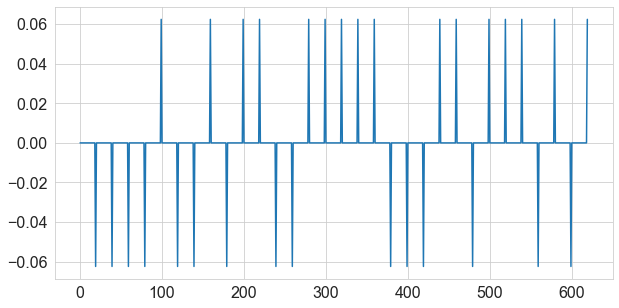

In [79]:
plt.figure(figsize=(10,5))
plt.plot(invprs)

In [80]:
ansCheck = periodic_corr(normVector(circonv), invprs)

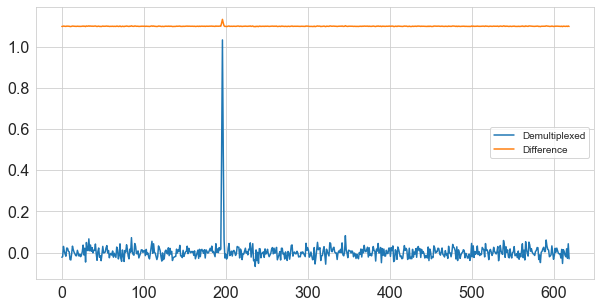

In [81]:
plt.figure(figsize=(10,5))
plt.plot(ansCheck, label = "Demultiplexed")
plt.plot((ansCheck-normVector(y))+1.1, label = "Difference")
plt.legend()